In [5]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',
                                header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.set(font_scale=1.0)
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<Figure size 1250x1250 with 30 Axes>

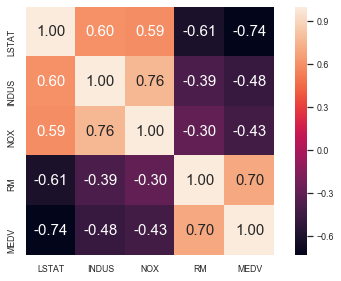

In [7]:
import numpy as np

# y軸の目盛ラベルが、カラーマトリクスとズレることに対応。
sns.set(font_scale=0.8)

# y軸の見切れ対策。sns.heatmap()の前に実行しないといけない。
fig, ax = plt.subplots()

cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)

# y軸の見切れ対策。sns.heatmap()の後に実行しないといけない。
ax.set_ylim(len(cols), 0)

plt.tight_layout()
plt.show()

In [8]:
class LinearReguressioGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [9]:

import numpy as np
a = np.array([[1, 2, 3],[4, 5, 6]])
b = np.array([1, 2, 3])

# 1 * 1 + 2 * 2 + 3 * 3 = 14
# 4 * 1 + 5 * 2 + 6 * 3 = 32
a.dot(b)

array([14, 32])

In [10]:
a = np.array([[1, 2, 3],[4, 5, 6]])
b = np.array([[1, 2, 3], [0, 1, 2], [1, 2, 0]])

a.dot(b)

array([[ 4, 10,  7],
       [10, 25, 22]])

In [11]:
a = np.array([[1, 2, 3],[4, 5, 6]])
b = np.array([1, 2, 3, 4])

a.dot(b)

ValueError: shapes (2,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [12]:
a = np.array([[0, 1, 2, 3],[4, 5, 6, 7]])
b = np.array([0, 1, 2, 3])

a.dot(b)

array([14, 38])

In [13]:
a = np.array([[0, 1, 2, 3],[4, 5, 6, 7]])
b = np.array([0, 1, 2, 3])

b.dot(a)

ValueError: shapes (4,) and (2,4) not aligned: 4 (dim 0) != 2 (dim 0)

In [14]:
# ２次元なんだけど、特徴量RMしか取得しないので結果的には１列しかない。ふつうは特徴量を複数もってくるので、複数列になる。
X = df[['RM']].values

# 正解データはX１件ごとに１つしかないわけだから、1次元になる（ベクトルになる）。
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearReguressioGD()
lr.fit(X_std, y_std)

In [16]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

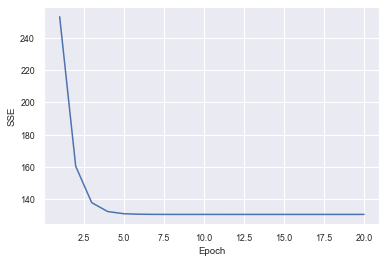

In [15]:
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

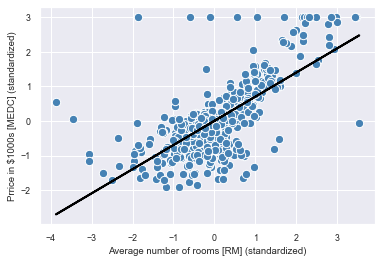

In [17]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

lin_regplot(X_std, y_std, lr)

plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Prrice in $1000s [MEDC] (standardized)')
plt.show()

In [18]:
num_rooms_std = sc_x.transform([[5.0]])

price_std = lr.predict(num_rooms_std)

print("Price i $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price i $1000s: 10.840


In [19]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [20]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


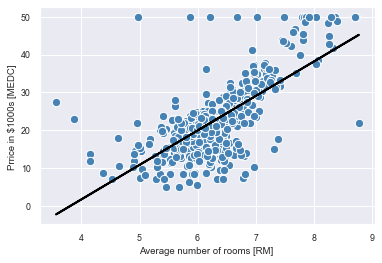

In [21]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] ')
plt.ylabel('Prrice in $1000s [MEDC] ')
plt.show()

In [22]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', residual_threshold=5.0, random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

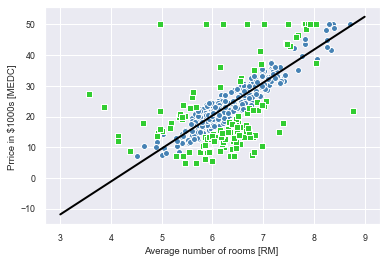

In [23]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers')

plt.plot(line_X, line_y_ransac, color='black', lw=2)

plt.xlabel('Average number of rooms [RM] ')
plt.ylabel('Prrice in $1000s [MEDC] ')
plt.show()

In [24]:
a = np.arange(3, 10, 1)

print(a)
print(a[:3])
print(a[:])

b = a[:, np.newaxis]
print(b)
print(b.shape)

[3 4 5 6 7 8 9]
[3 4 5]
[3 4 5 6 7 8 9]
[[3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(7, 1)


In [25]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


In [26]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [27]:
np.array([[0, 1, 2], [3, 4, 5]])[:,:-1]

array([[0, 1],
       [3, 4]])

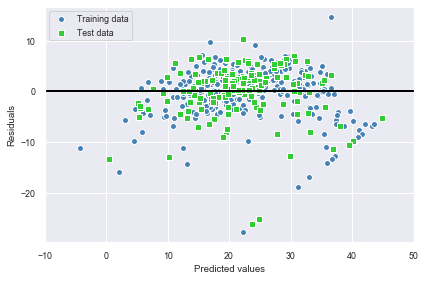

In [28]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                                                  (mean_squared_error(y_test, y_test_pred))))

MSE train: 19.958, test: 27.196


In [30]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


In [31]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [33]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# 列ベクトルにする
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [35]:
print(X)

# 例えば
# 258 -> 1, 258, 258^2
# 270 -> 1, 270, 270^2
print(X_quad)

[[258.]
 [270.]
 [294.]
 [320.]
 [342.]
 [368.]
 [396.]
 [446.]
 [480.]
 [586.]]
[[1.00000e+00 2.58000e+02 6.65640e+04]
 [1.00000e+00 2.70000e+02 7.29000e+04]
 [1.00000e+00 2.94000e+02 8.64360e+04]
 [1.00000e+00 3.20000e+02 1.02400e+05]
 [1.00000e+00 3.42000e+02 1.16964e+05]
 [1.00000e+00 3.68000e+02 1.35424e+05]
 [1.00000e+00 3.96000e+02 1.56816e+05]
 [1.00000e+00 4.46000e+02 1.98916e+05]
 [1.00000e+00 4.80000e+02 2.30400e+05]
 [1.00000e+00 5.86000e+02 3.43396e+05]]


In [36]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [37]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

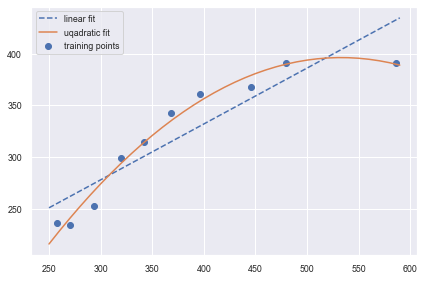

In [38]:
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='uqadratic fit')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [40]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('Training MSE linear: %.3f, quadratic: %.3f' % (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


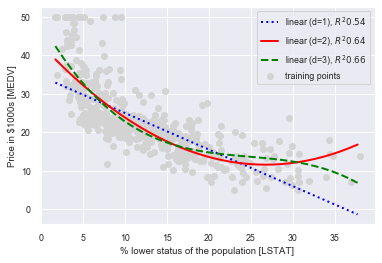

In [43]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

regr = regr.fit(X, y)
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='linear (d=2), $R^2%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='linear (d=3), $R^2%.2f$' % cubic_r2, color='green', lw=2, linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

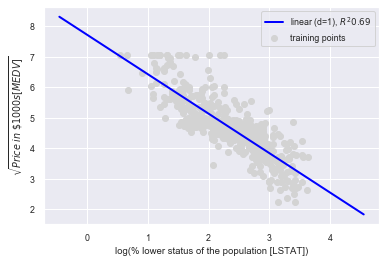

In [49]:
# 特徴量を適切に変換すれば、わざわざ特徴量を多項式で作らなくても良い、という例

X_log = np.log(X)
y_sqrt = np.sqrt(y)

regr = regr.fit(X_log, y_sqrt)

X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2%.2f$' % linear_r2, color='blue', lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s [MEDV]}$')
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Price in $1000s [MEDV]')

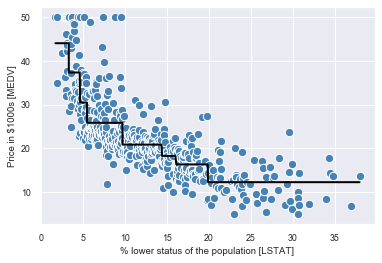

In [50]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')

In [52]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=1)

forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                                                  mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                                                                  r2_score(y_test, y_test_pred)))

MSE train: 1.641, test: 11.056
R^2 train: 0.979, test: 0.878


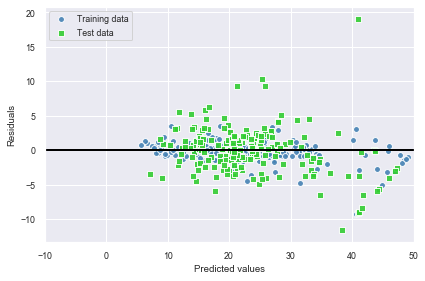

In [53]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', edgecolor='white', marker='o', s=35, alpha=0.9, label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', edgecolor='white', marker='s', s=35, alpha=0.9, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()